<a href="https://colab.research.google.com/github/umanari145/python_ai/blob/main/zero_kara_data_case02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=1e095befb75e1763cd3c054064178025b00ab9d2d96d33ffb1dcbb391582eb50
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [4]:
import pandas as pd
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import japanize_matplotlib
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/ginko_train.csv')
test = pd.read_csv('/content/drive/My Drive/ginko_test.csv')
sample = pd.read_csv('/content/drive/My Drive/ginko_sample.csv', header=None)
test

Mounted at /content/drive


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18078,18079,30,management,married,tertiary,no,32,yes,no,unknown,6,may,122,3,-1,0,unknown
18079,18080,35,management,married,tertiary,no,1557,yes,yes,cellular,5,feb,225,1,268,1,failure
18080,18081,33,housemaid,married,primary,no,1713,yes,no,unknown,8,may,22,1,-1,0,unknown
18081,18082,37,blue-collar,married,secondary,no,-251,yes,no,cellular,12,may,146,3,370,1,failure


In [18]:
# カラムの型を判定
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [6]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [10]:
## yによるグルーピング集計
train["y"].value_counts()

0    23954
1     3174
Name: y, dtype: int64

In [5]:
## cross集計
## 婚姻結果ごとの講座開設者
pd.crosstab(train["marital"], train["y"], margins=True)

y,0,1,All
marital,,,
divorced,2691,364,3055
married,14744,1667,16411
single,6519,1143,7662
All,23954,3174,27128


In [11]:
## ageのビニング(グルーピング)
train["age"].describe()

count    27128.000000
mean        40.951010
std         10.608542
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [14]:
age_bining = pd.cut(train["age"], [0,20,30,40,50,60,100])
age_bining

0         (30, 40]
1         (50, 60]
2         (30, 40]
3        (60, 100]
4         (30, 40]
           ...    
27123     (40, 50]
27124     (30, 40]
27125     (30, 40]
27126     (30, 40]
27127     (20, 30]
Name: age, Length: 27128, dtype: category
Categories (6, interval[int64, right]): [(0, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] <
                                         (60, 100]]

In [17]:
pd.crosstab(age_bining, train['y'], margins=True)

y,0,1,All
age,,,
"(0, 20]",39,21,60
"(20, 30]",3486,655,4141
"(30, 40]",9488,1111,10599
"(40, 50]",6117,602,6719
"(50, 60]",4416,488,4904
"(60, 100]",408,297,705
All,23954,3174,27128


In [21]:
## 決定木
## 基本的な２択を繰り返していくことで判別、回帰を行う
## パラメーター調整が下手だと過学習をしやすい

# graphvixは元々入っているっぽい
from graphviz import Digraph
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

trainX = train.iloc[:, 0:17]
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


In [28]:
trainY = train["y"]


In [30]:
testX = test.copy();
# dummy変数によるフラグ化
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)


,id,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,30,1028,4,1294,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,39,426,18,1029,1,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,38,-572,5,26,24,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,34,-476,27,92,4,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,37,62,31,404,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18078,18079,30,32,6,122,3,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
18079,18080,35,1557,5,225,1,268,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18080,18081,33,1713,8,22,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
18081,18082,37,-251,12,146,3,370,1,0,1,...,0,0,1,0,0,0,1,0,0,0


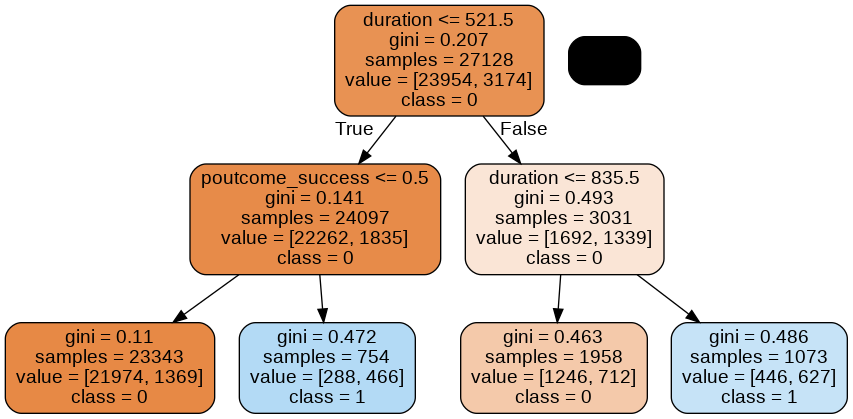

In [33]:
clf1 = DT(max_depth=2, min_samples_leaf= 500)
clf1.fit(trainX, trainY)
export_graphviz(clf1, out_file="tree.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="tree.dot")
Image(g.create_png())

In [34]:
pred = clf1.predict_proba(testX)

In [35]:
pred

array([[0.41565704, 0.58434296],
       [0.41565704, 0.58434296],
       [0.94135287, 0.05864713],
       ...,
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713]])

In [36]:
pred[:, 1]

array([0.58434296, 0.58434296, 0.05864713, ..., 0.05864713, 0.05864713,
       0.05864713])

In [38]:
sample[1] = pred
sample.to_csv('/content/drive/My Drive/ginko_submit.csv', index=None, header=None)